In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
file = "../../data/envipe/TVivienda.csv"

In [8]:
df_TVivienda = pd.read_csv(file)

In [12]:
df_TVivienda = df_TVivienda[(df_TVivienda.ENT == 9)]

In [13]:
df_TVivienda.AREAM.value_counts()

1.0    1833
Name: AREAM, dtype: int64

## Victimización

In [2]:
file = "../../data/envipe/TMod_Vic.csv"

In [3]:
df = pd.read_csv(file)

In [4]:
df.head()

,Unnamed: 0,ID_DEL,UPM,VIV_SEL,HOGAR,ND_TIPO,TD_TIPO,BPCOD,R_SEL,AREAM_OCU,...,BP6_1,BP6_2,BP6_3,BP7_1,FAC_DEL,EST_DIS,UPM_DIS,DOMINIO,ESTRATO,FAC_DEL_AM
0,0,0100155.01.01.02.08.1,100155,1,1,1,1,8,2,14.0,...,NaN,NaN,NaN,NaN,627,5,21,U,3,624
1,1,0100462.01.01.02.08.1,100462,1,1,1,1,8,2,14.0,...,NaN,NaN,NaN,NaN,378,5,64,U,3,376
2,2,0100467.04.01.02.02.1,100467,4,1,1,1,2,2,14.0,...,NaN,NaN,NaN,NaN,180,5,66,U,3,181
3,3,0102317.19.01.01.02.1,102317,19,1,1,1,2,1,14.0,...,NaN,NaN,NaN,NaN,152,2,275,C,3,0
4,4,0100738.02.01.02.02.1,100738,2,1,1,1,2,2,14.0,...,NaN,NaN,NaN,NaN,189,5,92,U,3,189


In [5]:
df.shape

(44699, 124)

In [6]:
df_copy = df.copy()

In [ ]:
df_copy.MUN

In [31]:
df_copy.columns

Index(['Unnamed: 0', 'ID_DEL', 'UPM', 'VIV_SEL', 'HOGAR', 'ND_TIPO', 'TD_TIPO',
       'BPCOD', 'R_SEL', 'AREAM_OCU',
       ...
       'BP6_1', 'BP6_2', 'BP6_3', 'BP7_1', 'FAC_DEL', 'EST_DIS', 'UPM_DIS',
       'DOMINIO', 'ESTRATO', 'FAC_DEL_AM'],
      dtype='object', length=124)

## Check NA

In [32]:
df_copy.isnull().any().any()

True

In [33]:
df_copy.columns[df_copy.isnull().any()]

Index(['AREAM_OCU', 'BP1_6', 'BP1_7', 'BP1_8', 'BP1_9', 'BP1_10_1', 'BP1_10_2',
       'BP1_10_9', 'BP1_11', 'BP1_12_1', 'BP1_12_2', 'BP1_12_3', 'BP1_12_4',
       'BP1_12_5', 'BP1_12_9', 'BP1_13', 'BP1_14_1', 'BP1_14_2', 'BP1_14_3',
       'BP1_14_4', 'BP1_14_9', 'BP1_15', 'BP1_16_1', 'BP1_16_2', 'BP1_16_3',
       'BP1_16_4', 'BP1_16_9', 'BP1_17', 'BP1_18', 'BP1_19_1', 'BP1_19_2',
       'BP1_19_3', 'BP1_19_4', 'BP1_19_5', 'BP1_19_6', 'BP1_19_7', 'BP1_19_8',
       'BP1_21', 'BP1_22', 'BP1_23', 'BP1_24', 'BP1_25', 'BP1_26', 'BP1_27',
       'BP1_28', 'BP1_29', 'BP1_31_1', 'BP1_31_2', 'BP1_31_3', 'BP1_31_4',
       'BP1_31_5', 'BP1_31_6', 'BP1_31_7', 'BP1_31_8', 'BP1_31_9', 'BP1_32_1',
       'BP1_32_2', 'BP1_32_3', 'BP1_32_4', 'BP1_32_5', 'BP1_32_9', 'BP1_34',
       'BP1_35', 'BP1_36_01', 'BP1_36_02', 'BP1_36_03', 'BP1_36_04',
       'BP1_36_05', 'BP1_36_06', 'BP1_36_07', 'BP1_36_08', 'BP1_36_09',
       'BP1_36_10', 'BP1_36_11', 'BP1_36_99', 'BP2_1', 'BP3_1_01', 'BP3_1_02',
       

In [34]:
len(pd.isnull(df_copy).any(1).nonzero()[0].tolist())

44699

In [35]:
df_copy.replace(to_replace=' ', value=np.NaN, inplace=True)

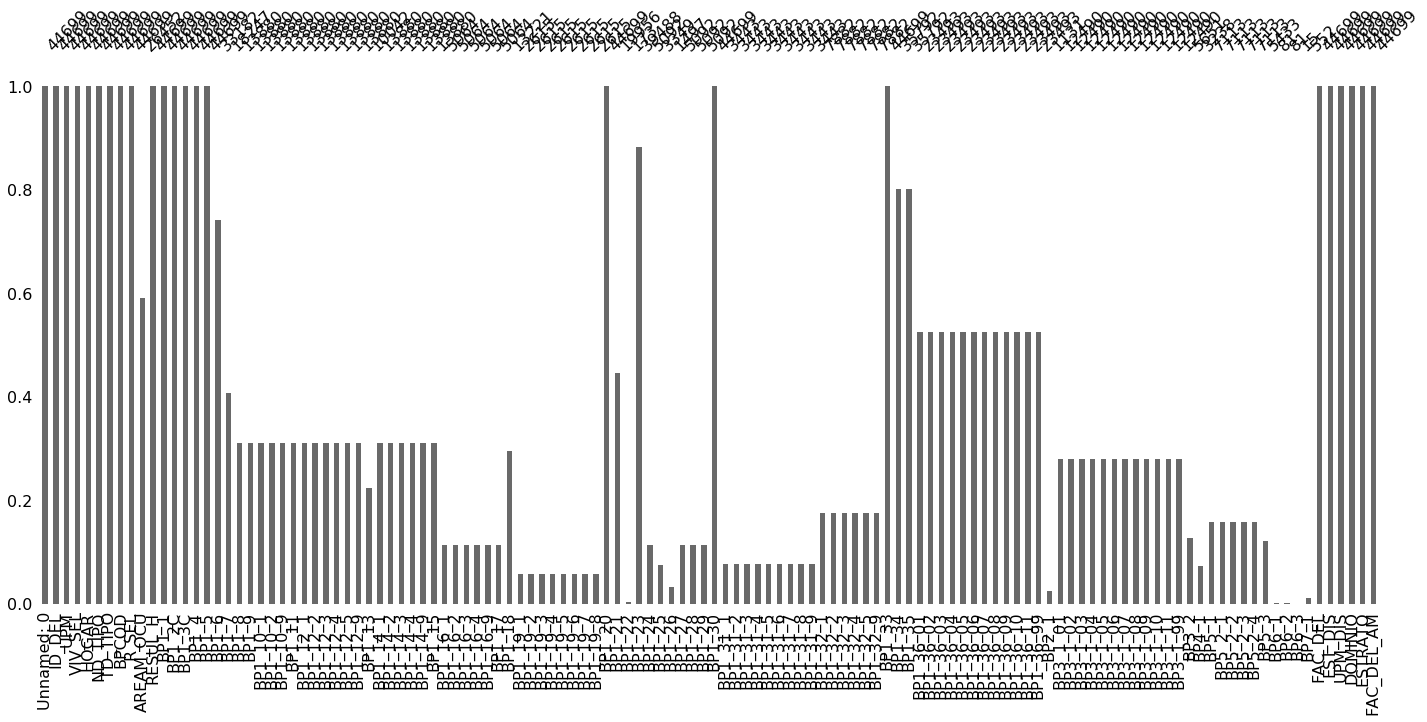

In [36]:
msno.bar(df_copy)
plt.savefig('../../images/pre_load_bar_TMod_Vic.png')

In [37]:
df_copy.fillna(value=-1, inplace=True)

In [38]:
threshold = round(df_copy.shape[0]*.8)
threshold

35759

In [39]:
l = []
for column in df_copy.columns:
    na_column =  df_copy[column].value_counts().get(-1)
    if(na_column != None):
        #print(column, ': ', df_copy.shape[0] - na_column, ' - ', threshold)
        if (df_copy.shape[0] - na_column < threshold):
            #print(column, ': ', 'd e l e t e d')
            l.append(column)

In [40]:
df_copy.shape

(44699, 124)

In [41]:
len(l)

98

In [42]:
df_copy.drop(labels=l, axis=1, inplace=True)

In [43]:
df_copy.replace(to_replace=-1, value=np.NaN, inplace=True)

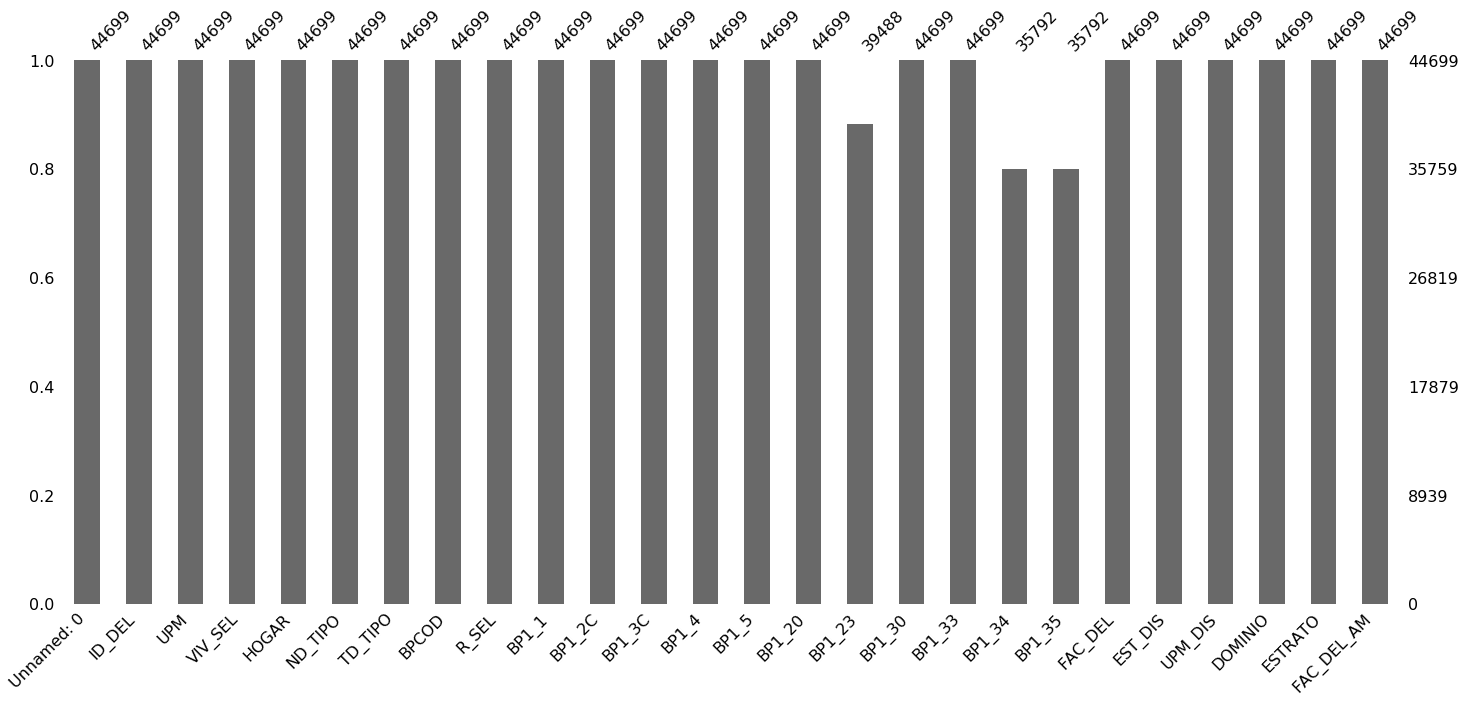

In [44]:
msno.bar(df_copy)
plt.savefig('../../images/post_load_bar_TMod_Vic.png')

In [45]:
df_copy.isnull().any().any()

True

In [23]:
df_copy.shape

(44699, 26)

In [24]:
file = "../../dataframes/TMod_Vic.csv"

In [25]:
df_copy.to_csv(file)